In [1]:




import pandas as pd
df = pd.read_csv('c:/data/ram/ram_price.csv')
df.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


Text(0, 0.5, 'price ($/Mbyte)')

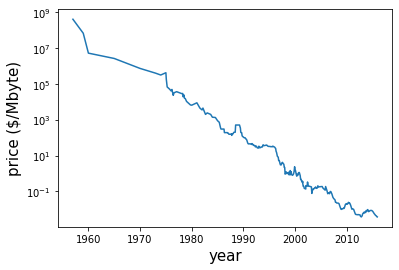

In [2]:
import matplotlib.pyplot as plt
#y축 로그 스케일
plt.semilogy(df['date'], df['price'])
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)
# x , y 축 날짜 축 램 가격
#시간이 지날수록 램 가격은 점차 하락하고 있음

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
# 학습용과 검증용 구분 (2000년 이전과 이후로 구분)
X_train0 = df[df['date'] < 2000]
X_test = df[df['date'] >= 2000]
# 기계학습모형에는 2차원 형태의 데이터가 입력되어야 함
X_train = X_train0['date'][:, None] # date 필드만을 선택하여 2차원으로 변환
# y값을 로그 스케일로 변환
y_train = np.log(X_train0['price'])
tree = DecisionTreeRegressor().fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train) #선형회귀모형

C:\Users\tjoeun\AppData\Local\Temp/ipykernel_18180/3139835252.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train0['date'][:, None] # date 필드만을 선택하여 2차원으로 변환


In [ ]:
#전체 기간의 자료
x_all = np.array(df['date']).reshape(-1,1)
pred_tree=tree.predict(x_all)
price_tree=np.exp(pred_tree) # log값 되돌리기
pred_lr = lr.predict(x_all)
price_lr = np.exp(pred_lr) # log값 되돌리기

Text(0, 0.5, 'price ($/Mbyte)')

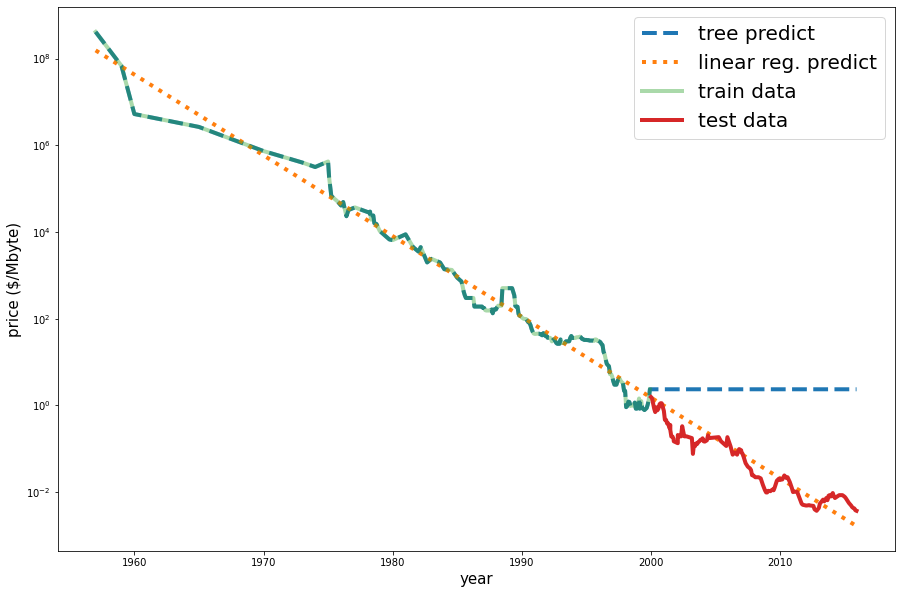

In [5]:
# 실제값과 결정트리모형의 예측값, 선형회귀모형의 예측값 비교
plt.figure(figsize=(15,10))
plt.semilogy(df['date'], price_tree, label='tree predict',
lw='4', ls='--')
plt.semilogy(df['date'], price_lr, label='linear reg. predict', lw='4', ls=':')
plt.semilogy(X_train0['date'], X_train0['price'], label='train data', lw='4', alpha=0.4)
plt.semilogy(X_test['date'], X_test['price'], lw='4', label='test data')
plt.legend(loc=1, fontsize=20)
plt.xlabel('year', size=15)
plt.ylabel('price ($/Mbyte)', size=15)
# : 선형회귀모형 직선모양
# 결정트리모형은 학습용 데이터의 범위를 벗어나는 새로운 데이터를 예측할 능력이 없음 (트리 모형의 단점)
# 새로운 데이터를 예측하려면 시계열분석, 순환신경망(RNN) 등을 사용하여 분석하는 방법을 사용해야 함